## 데이터 수집

- 서울시 공공자전거 대여소별 이용정보
- 서울시 공공자전거 시간대별 이용정보
- 서울시 공공자전거 대여소 정보

In [1]:
import seaborn as sns

sns.set(font_scale=1) # seaborn 기초 세팅

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [3]:
import warnings
warnings.simplefilter("ignore")

### 데이터 로드

#### 1) 시간대별

In [4]:
bike3 = pd.read_csv('../../data/dataset/공공자전거/서울특별시 공공자전거 이용정보(시간대별)_21.12.csv', encoding='cp949')
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-12-01,0,953,953. 서울연신초등학교,정기권,NaN,~10대,1,0.00,0.00,0.00,14
1,2021-12-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,30.60,0.28,1207.46,7
2,2021-12-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,26.03,0.25,1095.63,6
3,2021-12-01,0,280,280. 양평동6차현대아파트 앞,정기권,NaN,~10대,1,36.53,0.29,1230.00,7
4,2021-12-01,0,1184,1184. 마곡13단지,정기권,NaN,~10대,1,0.00,0.00,0.00,17


#### 2) 대여소별

In [5]:
bike2 = pd.read_csv("../../data/dataset/공공자전거/대여소별 이용정보(월별 '21.7-'21.12).csv", encoding='cp949', skiprows=3)
bike2.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,그룹명 없음,대여소명 없음,202107,0
1,강남구,2301. 현대고등학교 건너편,202107,2545
2,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202107,1176
3,강남구,2303. 논현역 7번출구,202107,1467
4,강남구,2304. 신영 ROYAL PALACE 앞,202107,349


#### 3) 대여소정보

In [6]:
bike1 = pd.read_csv("../../data/dataset/공공자전거/공공자전거 대여소 정보(21.12월 기준).csv")
bike1.head(5)

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,거치대수LCD,거치대수_QR,운영\n방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,42253.98757,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,42253.98834,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,42253.98925,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,42253.98993,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,42253.99064,10.0,NaN,LCD


## 데이터 탐색

In [7]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2586 non-null   int64  
 1   보관소(대여소)명  2586 non-null   object 
 2   자치구        2586 non-null   object 
 3   상세주소       2586 non-null   object 
 4   위도         2586 non-null   float64
 5   경도         2586 non-null   float64
 6   설치시기       2586 non-null   float64
 7   거치대수LCD    1400 non-null   float64
 8   거치대수_QR    1187 non-null   float64
 9   운영
방식      2586 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 202.2+ KB


In [8]:
bike1.describe()

,대여소번호,위도,경도,설치시기,거치대수LCD,거치대수_QR
count,2586.000000,2586.000000,2586.000000,2586.000000,1400.000000,1187.000000
mean,2110.668987,37.547230,126.991710,43467.861376,12.666429,11.679865
std,1420.431320,0.051938,0.092821,661.563905,4.728000,4.776484
min,102.000000,37.430977,126.798599,42253.987570,5.000000,4.000000
25%,923.250000,37.505417,126.914808,42899.624465,10.000000,10.000000
50%,1845.500000,37.546198,127.002693,43402.000000,10.000000,10.000000
75%,3412.750000,37.577216,127.064451,44062.250000,15.000000,15.000000
max,5075.000000,37.691013,127.180641,44551.000000,40.000000,40.000000


In [9]:
bike1.describe(include=object)

,보관소(대여소)명,자치구,상세주소,운영\n방식
count,2586,2586,2586,2586
unique,2584,25,2486,2
top,신봉천주유소,송파구,국회의사당 경내,LCD
freq,2,207,7,1400


In [10]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15148 entries, 0 to 15147
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소 그룹     15148 non-null  object
 1   대여소 명      15148 non-null  object
 2   대여 일자 / 월  15148 non-null  int64 
 3   대여 건수      15148 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 473.5+ KB


In [11]:
bike2.describe()

,대여 일자 / 월,대여 건수
count,15148.000000,15148.000000
mean,202109.524558,1212.994389
std,1.709315,1129.237358
min,202107.000000,0.000000
25%,202108.000000,477.000000
50%,202110.000000,919.000000
75%,202111.000000,1588.000000
max,202112.000000,20258.000000


In [12]:
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519851 entries, 0 to 1519850
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1519851 non-null  object 
 1   대여시간    1519851 non-null  int64  
 2   대여소번호   1519851 non-null  int64  
 3   대여소명    1519851 non-null  object 
 4   대여구분코드  1519851 non-null  object 
 5   성별      922567 non-null   object 
 6   연령대코드   1519851 non-null  object 
 7   이용건수    1519851 non-null  int64  
 8   운동량     1519851 non-null  object 
 9   탄소량     1519851 non-null  object 
 10  이동거리    1519851 non-null  float64
 11  사용시간    1519851 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 139.1+ MB


In [13]:
bike3.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,1.519851e+06,1.519851e+06,1.519851e+06,1.519851e+06,1.519851e+06
mean,1.377178e+01,1.871455e+03,1.075927e+00,1.884785e+03,2.087353e+01
std,5.570457e+00,1.381014e+03,3.232473e-01,2.652249e+03,2.588502e+01
min,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,7.290000e+02,1.000000e+00,4.384300e+02,6.000000e+00
50%,1.500000e+01,1.470000e+03,1.000000e+00,1.145720e+03,1.200000e+01
75%,1.800000e+01,2.721000e+03,1.000000e+00,2.280000e+03,2.500000e+01
max,2.300000e+01,8.888800e+04,1.400000e+01,2.016378e+05,1.407000e+03


## 데이터 전처리

### 1) bike1

> 컬럼명 변경
> - '대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식'

In [14]:
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

> 상세주소, 위·경도 컬럼 제거

In [15]:
bike1.drop(columns=['상세주소', '위도', '경도'], inplace=True)

> NaN 처리
> - bike1의 NaN 확인한 후 0 으로 채우기

In [16]:
bike1.isnull().sum()

대여소번호         0
대여소명          0
자치구           0
설치시기          0
거치대수lcd    1186
거치대수qr     1399
운영방식          0
dtype: int64

In [17]:
bike1.fillna(0, inplace=True)

In [18]:
bike1.dtypes

대여소번호        int64
대여소명        object
자치구         object
설치시기       float64
거치대수lcd    float64
거치대수qr     float64
운영방식        object
dtype: object

### 2) bike2

> 대여소명이 번호랑 문자랑 같이 구성
> - 대여소번호 컬럼을 생성한 후 대여소 명에서 번호를 분리한 값 담기
> - 대여소명_new 컬럼을 생성한 후 대여소 명에서 이름을 분리한 값 담기

In [19]:
bike2['대여소번호'] = bike2['대여소 명'].str.split('.', expand=True)[0]
bike2['대여소명_new'] = bike2['대여소 명'].str.split('.', expand=True)[1]

> 대여소명_new 가 None인 값 확인

In [20]:
bike2[bike2['대여소명_new'].isnull()]

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,그룹명 없음,대여소명 없음,202107,0,대여소명 없음,None
2199,정비센터,상담센터,202107,138,상담센터,None
2200,정비센터,상암센터 정비실,202107,8,상암센터 정비실,None
2201,정비센터,위트콤,202107,8,위트콤,None
2202,정비센터,중랑센터,202107,24,중랑센터,None
2203,정비센터,천왕센터,202107,1,천왕센터,None
2204,정비센터,천호센터,202107,0,천호센터,None
2205,정비센터,훈련원센터,202107,3,훈련원센터,None
2478,그룹명 없음,대여소명 없음,202108,0,대여소명 없음,None
4695,정비센터,도봉정비센터,202108,7,도봉정비센터,None


> None 값 전부 제거

In [22]:
bike_df2 = bike2.dropna(subset=['대여소명_new']).copy()
bike_df2.isnull().sum()

대여소 그룹       0
대여소 명        0
대여 일자 / 월    0
대여 건수        0
대여소번호        0
대여소명_new     0
dtype: int64

### 3) bike3

In [23]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-12-01,0,953,953. 서울연신초등학교,정기권,NaN,~10대,1,0.00,0.00,0.00,14
1,2021-12-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,30.60,0.28,1207.46,7
2,2021-12-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,26.03,0.25,1095.63,6
3,2021-12-01,0,280,280. 양평동6차현대아파트 앞,정기권,NaN,~10대,1,36.53,0.29,1230.00,7
4,2021-12-01,0,1184,1184. 마곡13단지,정기권,NaN,~10대,1,0.00,0.00,0.00,17


#### 대여소명_new

In [27]:
bike3['대여소명_new'] = bike3['대여소명'].str.split(".", expand=True)[1]

In [28]:
bike3.head(2)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-12-01,0,953,953. 서울연신초등학교,정기권,NaN,~10대,1,0.00,0.00,0.00,14,서울연신초등학교
1,2021-12-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,30.60,0.28,1207.46,7,중계역 6번출구


#### 성별 컬럼에 들어있는 값 확인

In [29]:
bike3['성별'].unique()

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

In [40]:
bike3.loc[bike3['성별'] == 'm', '성별'] = 'M'

In [41]:
bike3.loc[bike3['성별'] == 'f', '성별'] = 'F'

In [43]:
bike3['성별'].unique()

array([nan, 'F', 'M'], dtype=object)

In [44]:
bike3.dtypes

대여일자         object
대여시간          int64
대여소번호         int64
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량          object
탄소량          object
이동거리        float64
사용시간          int64
대여소명_new     object
dtype: object

#### 데이터타입변경

- 1) astype('변경타입')
- 2) pd.to_numeric('변경할 컬럼') : 적절한 숫자 타입으로 변경 ( NaN 이 있다면 사용 )

In [45]:
pd.to_numeric(bike3['탄소량'])

ValueError: Unable to parse string "\N" at position 97

In [46]:
bike3['탄소량'].astype('float')

ValueError: could not convert string to float: '\\N'

In [50]:
bike3.loc[bike3['운동량'] == r'\N', '운동량'] = -1
bike3.loc[bike3['탄소량'] == r'\N', '탄소량'] = -1

In [51]:
bike3['운동량'] = pd.to_numeric(bike3['운동량'])
bike3['탄소량'] = bike3['탄소량'].astype('float64')

In [52]:
bike3.dtypes

대여일자         object
대여시간          int64
대여소번호         int64
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량         float64
탄소량         float64
이동거리        float64
사용시간          int64
대여소명_new     object
dtype: object

#### 대여일자 타입 변경 ( object ==> datetime )

In [53]:
bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])

In [54]:
bike3.dtypes

대여일자        datetime64[ns]
대여시간                 int64
대여소번호                int64
대여소명                object
대여구분코드              object
성별                  object
연령대코드               object
이용건수                 int64
운동량                float64
탄소량                float64
이동거리               float64
사용시간                 int64
대여소명_new            object
dtype: object

## 데이터 분석

- 이동거리 / 평균 사용시간이 높은 대여소는 ?
- 운동량과 이동거리의 상관관계는 ?
- 따릉이를 가장 많이 이용하는 성별은 ?
- 구별 설치 거치대의 개수는 ?
- 구별 대여건수 지도 시각화

In [65]:
# bike3 의 이동거리 컬럼 이용
# 이동거리가 큰 순서대로 대여소명 추출
bike3.sort_values('이동거리', ascending=False)['대여소명']

523612          3645. 구역삼세무서 교차로
116136             426. 서울신용보증재단
462284         4870. 몽촌토성역 3번 출구
104566            2140. 신림1교 교차로
906954            2024. 상도역 1번출구
                   ...          
845792           680.꿈마루어린이도서관 앞
845790        170. 가재울 뉴타운 주유소 옆
845775              1864.산호시티빌 옆
845770           2635.잠실새내역 1번출구
759925    1220. 잠실본동주민센터뒤 잠실근린공원
Name: 대여소명, Length: 1519851, dtype: object

In [68]:
bike3.groupby('대여소명_new')['이동거리'].mean().reset_index().sort_values('이동거리', ascending=False)

,대여소명_new,이동거리
352,금암 문화공원,6625.884390
1707,정곡나들목,5936.050396
2028,흑석역 1번출구,5903.616158
1483,옥수역 3번출구,5793.194706
1358,압구정나들목,5733.930754
...,...,...
1861,탑성마을입구,704.604545
1278,신방화역 8번출구,703.498750
2068,강남센터,531.672778
2422,영남배송,0.000000


In [66]:
# 사용시간이 높은 순서대로 대여소명 추출
bike3.sort_values('사용시간', ascending=False)['대여소명']

479317       2279. 교대역 5번출구뒤
405023    1975. 대림역 1번 출입구 밑
332365       838. 숙대입구역 4번출구
215193       182. 망원2빗물펌프장 앞
263054         2372. 대치역 사거리
                 ...        
296861             9980. 에이텍
296842                  상담센터
55735      4589. KRX한국거래소(1)
674099            1565.대한병원앞
593486        1468.먹골역 7번 출구
Name: 대여소명, Length: 1519851, dtype: object

In [69]:
bike3.groupby('대여소명_new')['사용시간'].mean().reset_index().sort_values('사용시간', ascending=False)

,대여소명_new,사용시간
1508,용답초등학교,57.000000
1707,정곡나들목,54.044554
2298,서울숲 공영주차장앞,51.470899
1047,서울숲 관리사무소,50.024000
1411,여의도중학교 옆,48.728814
...,...,...
665,마곡역1번출구,8.836618
1600,은평뉴타운 상림마을 13단지,8.727273
663,마곡역 교차로(2번출구),8.507395
1403,에이텍,7.200000


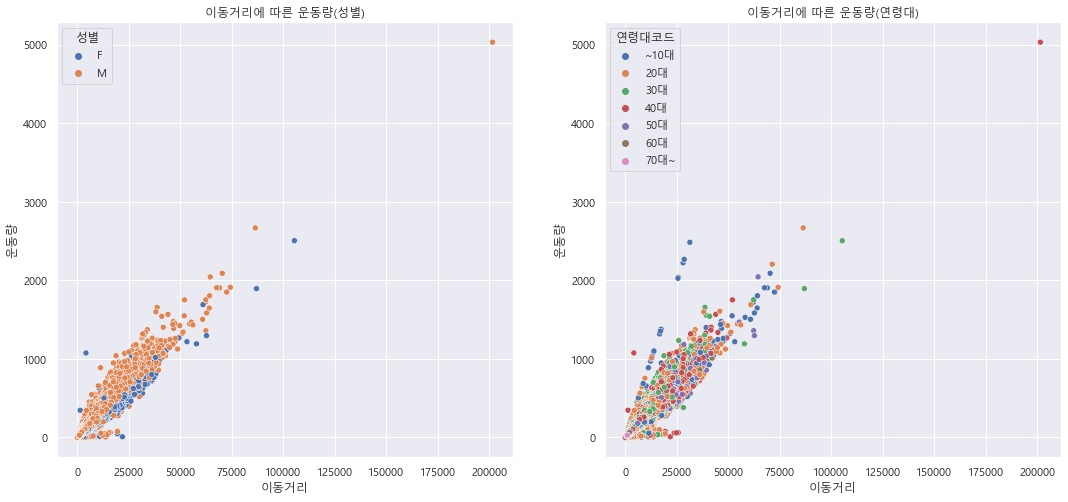

In [70]:
# 운동량과 이동거리의 상관관계는 ?

f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[0], hue='성별')
ax[0].set_title('이동거리에 따른 운동량(성별)')

sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[1], hue='연령대코드')
ax[1].set_title('이동거리에 따른 운동량(연령대)')

plt.show()

In [73]:
bike3['성별'].value_counts()

M    588688
F    333879
Name: 성별, dtype: int64

In [72]:
bike3['연령대코드'].value_counts()

20대     577996
30대     368024
40대     251584
50대     166998
~10대     95402
60대      52322
70대~      7525
Name: 연령대코드, dtype: int64

- 따릉이를 가장 많이 이용하는 성별은 ?

In [74]:
bike3['대여일자'].dt.year

0          2021
1          2021
2          2021
3          2021
4          2021
           ... 
1519846    2021
1519847    2021
1519848    2021
1519849    2021
1519850    2021
Name: 대여일자, Length: 1519851, dtype: int64

In [75]:
bike3['대여일자'].dt.month

0          12
1          12
2          12
3          12
4          12
           ..
1519846    12
1519847    12
1519848    12
1519849    12
1519850    12
Name: 대여일자, Length: 1519851, dtype: int64

In [76]:
bike3['대여일자'].dt.day

0           1
1           1
2           1
3           1
4           1
           ..
1519846    31
1519847    31
1519848    31
1519849    31
1519850    31
Name: 대여일자, Length: 1519851, dtype: int64

In [77]:
# 대여일자 데이터를 년/월/일 로 나누어서 새 컬럼에 대입
bike3['대여년도'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [78]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new,대여년도,대여월,대여일
0,2021-12-01,0,953,953. 서울연신초등학교,정기권,NaN,~10대,1,0.0,0.0,0.0,14,서울연신초등학교,2021,12,1


In [80]:
bike3_pivot = bike3.pivot_table(index='대여일', columns='성별', values='사용시간', aggfunc=sum)

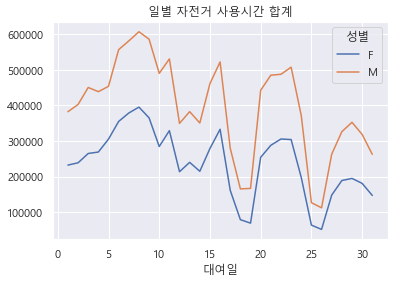

In [82]:
bike3_pivot.plot(title='일별 자전거 사용시간 합계');

#### 구별 거치대 개수

In [83]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,102,망원역 1번출구 앞,마포구,42253.98757,20.0,0.0,LCD
1,103,망원역 2번출구 앞,마포구,42253.98834,14.0,0.0,LCD
2,104,합정역 1번출구 앞,마포구,42253.98925,13.0,0.0,LCD
3,105,합정역 5번출구 앞,마포구,42253.98993,5.0,0.0,LCD
4,106,합정역 7번출구 앞,마포구,42253.99064,10.0,0.0,LCD


###### 총거치대수 = 거치대수lcd + 거치대수qr

In [84]:
bike1['총거치대수'] = bike1['거치대수lcd'] + bike1['거치대수qr']

###### bike_group DataFrame 생성

- bike1 자치구를 그룹으로 총 거치대수를 구한 결과
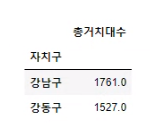

In [95]:
bike_group = bike1.groupby('자치구')['총거치대수'].sum('총거치대수').reset_index().set_index('자치구')
bike_group.head(2)

,총거치대수
자치구,
강남구,1761.0
강동구,1527.0


In [96]:
import folium
import json

geo_simple = "../../data/dataset/skorea_municipalities_geo_simple.json"
geo_data = json.load(open(geo_simple, encoding="utf-8"))
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '39020',
    'name': '서귀포시',
    'name_eng': 'Seogwipo-si',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[126.1701670531016, 33.27833920373795],
      [126.17796199822318, 33.28904450342792],
      [126.20366562455006, 33.292582069125935],
      [126.23227804627976, 33.28054651709448],
      [126.27081469983565, 33.29305651947374],
      [126.28692516789717, 33.3095121006344],
      [126.32582807936741, 33.32307849544494],
      [126.33863040850332, 33.33700002289742],
      [126.37692773779688, 33.34348978209229],
      [126.42008790072302, 33.33448285889923],
      [126.43967991919219, 33.34042205120408],
      [126.44742456956253, 33.35529267692266],
      [126.4918716225209, 33.351283204155564],
      [126.54001194569452, 33.35949354681064],
      [126.55310458705854, 33.368769331336765],
      [126.5830715764017, 33.368027779973275],
      [126.65655971322

In [99]:
m = folium.Map([37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_data,
    data=bike_group['총거치대수'],
    columns=['자치구', '총거치대수'],
    key_on='properties.name',
    legend_name='자치구별 따릉이 거치대수',
    fill_color='YlGnBu',
    fill_opacity=0.6,
    line_opacity=0.4
).add_to(m)

m

###### 구별 대여건수

In [100]:
bike_df2.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
1,강남구,2301. 현대고등학교 건너편,202107,2545,2301,현대고등학교 건너편
2,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202107,1176,2302,교보타워 버스정류장(신논현역 3번출구 후면)
3,강남구,2303. 논현역 7번출구,202107,1467,2303,논현역 7번출구
4,강남구,2304. 신영 ROYAL PALACE 앞,202107,349,2304,신영 ROYAL PALACE 앞
5,강남구,2305. MCM 본사 직영점 앞,202107,341,2305,MCM 본사 직영점 앞


In [101]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,102,망원역 1번출구 앞,마포구,42253.98757,20.0,0.0,LCD,20.0
1,103,망원역 2번출구 앞,마포구,42253.98834,14.0,0.0,LCD,14.0
2,104,합정역 1번출구 앞,마포구,42253.98925,13.0,0.0,LCD,13.0
3,105,합정역 5번출구 앞,마포구,42253.98993,5.0,0.0,LCD,5.0
4,106,합정역 7번출구 앞,마포구,42253.99064,10.0,0.0,LCD,10.0
